In [1]:
import re
import pandas as pd
import numpy as np
# import more_itertools as mit
# from datetime import datetime
import missingno as msngo
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import seaborn as sns
import requests
import PIL
import io
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# df = pd.read_excel('BBDD_Vehiculos_4_2021.xlsx', header=0)
# df_ori = pd.read_excel('XXEJE_Informe_Registro_de_Acti_081121.xls', header=0)
df_ori = pd.read_html('../Datos/XXEJE_FA___Reporte_de_Activos__010222.xls', header=0)[0]

In [3]:
# df_ori = pd.read_excel('XXEJE_Informe_Registro_de_Acti_081121.xls', header=0)
df_obj = df_ori.select_dtypes(['object'])
df_ori[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [4]:
# # df.head()
# mat = msngo.matrix(df_ori)
# mat.axes.tick_params(axis='y', labelsize=30)

In [5]:
# df = df_ori[['Numero Activo','MMU/PPU', 'Descripción', 'Marca', 'Modelo', 'UAC', 'UR', 'Atributo 2', 'Atributo 4', 'Atributo 5', 'Atributo 6', 'Atributo 9', 'Atributo 11', 'Atributo 19', 'Atributo 20', 'Atributo 24']]
df = df_ori[['Numero Activo','MMU/PPU', 'Descripción', 'Marca', 'Modelo', 'Categoría SIGLE', 'UAC', 'UR', 'Costo Actual', 'Situación Operacional', 'Condición del Bien', 'Año Fabricación', 'Cód. CIMAGE', 'Tipo Patente', 'Rueda/Repuesto/Batería/Combustible', 'Capacidad Estanque LTS', 'Función']]
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.rename(columns={'Rueda/Repuesto/Batería/Combustible':'Combustible', 'Capacidad Estanque LTS':'Estanque'}, inplace=True)

In [6]:
# mat = msngo.matrix(df)
# mat.axes.tick_params(axis='y', labelsize=30)

In [7]:
# data_cvo = df.isna().sum().sort_values(ascending=False)
# df_temp = pd.DataFrame({'columna': data_cvo.values})
# df_temp.index = data_cvo.index
# df_temp = df_temp.sort_values(by='columna',ascending=False)
# df_temp["cumper"] = df_temp["columna"].cumsum()/df_temp["columna"].sum()*100


# fig, ax = plt.subplots(figsize=(10,5))
# ax.bar(df_temp.index, df_temp["columna"], color="C0")
# ax2 = ax.twinx()
# ax2.plot(df_temp.index, df_temp["cumper"], color="C1", marker="D", ms=7)
# ax2.yaxis.set_major_formatter(PercentFormatter())

# ax.tick_params(axis="y", colors="C0")
# ax.tick_params(axis="x", rotation=80)
# ax2.tick_params(axis="y", colors="C1")
# plt.title('Gráfico de Pareto para la distribución de celdas vacias')
# plt.show()

In [8]:
# # df['test'] = []
# df['test'] = np.where(df['MMU/PPU'].str.contains('\*', regex=False),1 , 0)
# df['test'] = np.where(df['MMU/PPU'].str.contains(' '),1 , df['test'])
# df['test'] = np.where(df['MMU/PPU'].str.contains('.'),1 , df['test'])
# df['test'] = np.where(df['MMU/PPU'].str.contains('REP.'),1 , df['test'])
# # df['test'] = np.where(df['MMU/PPU'].str.contains('XW6996'),1 , df['test'])
# df['test'] = np.where(df['MMU/PPU'].str.contains('SINMATRICULA'),1 , df['test'])
# df['test'] = np.where(df['MMU/PPU'].str.contains('S/M'),1 , df['test'])

# print('Numero de errores a correguir '+str(df['test'].value_counts()[1]))

# df.drop(columns='test', inplace=True)

In [9]:
chars_to_remove = ['*', ' ']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'

df['MMU/PPU'] = df['MMU/PPU'].str.replace(regular_expression,'', regex=True)
df['MMU/PPU'] = df['MMU/PPU'].str.replace('.','-', regex=True)
df['MMU/PPU'] = df['MMU/PPU'].str.replace('REP-','', regex=True)
# df['MMU/PPU'] = df['MMU/PPU'].str.replace('XW6996','XW-6996', regex=True)
df['MMU/PPU'] = df['MMU/PPU'].str.replace('SINMATRICULA','', regex=True)
df['MMU/PPU'] = df['MMU/PPU'].str.replace('S/M','', regex=True)

In [10]:
# b=0
# for i, n in enumerate(df['MMU/PPU']):
#     try:
#         a = n.split('-')
#         if len(a) > 2:
#             if (re.match(r'[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{0}$', n)):
#                 df.loc[i, 'MMU/PPU'] = n[:-1]
#                 b=b+1
#             if (re.match(r'[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1}$', n)):
#                 df.loc[i, 'MMU/PPU'] = n[:-2]    
#                 b=b+1
#             if (re.match(r'[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{2}$', n)):
#                 df.loc[i, 'MMU/PPU'] = n[:-3]
#                 b=b+1
#             if (re.match(r'[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{3}$', n)):
#                 df.loc[i, 'MMU/PPU'] = n[:-4]
#                 b=b+1
#             if (re.match(r'[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}-[a-zA-Z0-9]{1,4}$', n)):
#                 df.loc[i, 'MMU/PPU'] = n[:-3]
#                 b=b+1
#     except:
#         b=b+0

# print('Errores relacionados a Patentes mal ingresadas '+str(b))

# df.drop_duplicates(subset='MMU/PPU', ignore_index=True, inplace=True)
# # df.reset_index(drop=True, inplace=True)
# # df

In [11]:
df['MMU/PPU'].fillna('SIN', inplace=True)

In [12]:
palabras = []
cambios = []
for i, n in enumerate(df['MMU/PPU']):
    match_w_n_w = re.findall("(([A-Z]+)([0-9]+)([A-Z]+))", n)
    match_n_w = re.findall("(([0-9]+)([A-Z]+))", n)
    match_w_n = re.findall("(([A-Z]+)([0-9]+))", n)
    if match_w_n_w:
        # palabras.append(match_w_n_w[0][0])
        palabras.append(n)
        b = []
        for (j, m) in list(enumerate(match_w_n_w[0]))[1:]:
            b.append(m)
        cambios.append('-'.join(b))
    elif match_n_w:
        # palabras.append(match_n_w[0][0])
        palabras.append(n)
        b = []
        for (j, m) in list(enumerate(match_n_w[0]))[1:]:
            b.append(m)
        cambios.append('-'.join(b))
    elif match_w_n:
        # palabras.append(match_w_n[0][0])
        palabras.append(n)
        b = []
        for (j, m) in list(enumerate(match_w_n[0]))[1:]:
            b.append(m)
        cambios.append('-'.join(b))
palabra_cambio = {}
palabra_cambio = dict(zip(palabras, cambios))

In [13]:
for i, n in enumerate(palabra_cambio):
    if len(n)<len(palabra_cambio[n])+1:
        df['MMU/PPU'] = df['MMU/PPU'].str.replace(n, palabra_cambio[n], regex=False)

In [14]:
df[df['MMU/PPU'].str.contains("([A-Z]+)-([0-9]+)-[0-9]{1}$")]['MMU/PPU'].unique()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_8012/3658226826.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['MMU/PPU'].str.contains("([A-Z]+)-([0-9]+)-[0-9]{1}$")]['MMU/PPU'].unique()


array(['BPVR-32-2', 'PYGG-31-6', 'PYGG-32-4', 'RJXG-25-5', 'GKLZ-18-4',
       'LH-3173-7', 'SN-9541-2', 'YU-6042-4', 'LTKW-93-3', 'LPXY-58-4',
       'LPXY-60-6', 'LPXY-62-2', 'LPXY-63-0', 'LPXY-65-7', 'TA-5761-1',
       'JG-4665-0', 'JG-4666-9', 'JG-4676-6', 'JWPG-22-6', 'JWPG-23-4',
       'JWPG-24-2', 'JWPG-25-0', 'JWPG-26-9', 'JWPG-27-7', 'JWPG-28-5',
       'JWPG-29-3', 'JWPG-30-7'], dtype=object)

In [15]:
palabras = []
cambios = []
for i, n in enumerate(df['MMU/PPU']):
    match_w_n_n = re.findall("(([A-Z]+)-([0-9]+)-([0-9]{1}$))", n)
    # match_n_w = re.findall("(([0-9]+)([A-Z]+))", n)
    # match_w_n = re.findall("(([A-Z]+)([0-9]+))", n)
    if match_w_n_n:
        # print(match_w_n_n[0])
        # palabras.append(match_w_n_w[0][0])
        palabras.append(n)
        b = []
        for (j, m) in list(enumerate(match_w_n_n[0]))[1:3]:
            b.append(m)
        cambios.append('-'.join(b))
    # elif match_n_w:
    #     # palabras.append(match_n_w[0][0])
    #     palabras.append(n)
    #     b = []
    #     for (j, m) in list(enumerate(match_n_w[0]))[1:]:
    #         b.append(m)
    #     cambios.append('-'.join(b))
    # elif match_w_n:
    #     # palabras.append(match_w_n[0][0])
    #     palabras.append(n)
    #     b = []
    #     for (j, m) in list(enumerate(match_w_n[0]))[1:]:
    #         b.append(m)
    #     cambios.append('-'.join(b))
palabra_cambio = {}
palabra_cambio = dict(zip(palabras, cambios))
# cambios

In [16]:
for i, n in enumerate(palabra_cambio):
    # print(n, palabra_cambio[n])
    if len(n)>len(palabra_cambio[n]): 
        df['MMU/PPU'] = df['MMU/PPU'].str.replace(n, palabra_cambio[n], regex=False)

In [17]:
# df['Costo Actual'] = df['Costo Actual'].str.replace('-', '', regex=False)
# df['Costo Actual'].fillna(0, inplace=True)

In [18]:
# b=0
# for i, n in enumerate(df['Costo Actual']):
#     try:
#         a = n.split('.')
#         if len(a) > 1:
#             if len(a[-1]) < 1:
#                 df.loc[i, 'Costo Actual'] = n[:-1]
#                 b=b+1
#     except:
#         # print(n)
#         b=b+0
        
# b=0
# for i, n in enumerate(df['Costo Actual']):
#     try:
#         a = n.split(',')
#         if len(a) > 1:
#             if (re.match(r'[0-9]+,[0-9]+,[0-9]+', n)):
#                 df.loc[i, 'Costo Actual'] = a[0]+'.'+a[1]+','+a[2]
#                 b=b+1
#     except:
#         # print(n)
#         b=b+0
        
# for i, n in enumerate(df['Costo Actual']):
#     try:
#         a = n.split(',')
#         if len(a) > 1:
#             if (re.match(r'[0-9]+,[0-9]+', n)):
#                 df.loc[i, 'Costo Actual'] = a[0]+'.'+a[1]
#                 # print(n)
#                 b=b+1
#     except:
#         # print(n)
#         b=b+0

# df['Costo Actual'] = df['Costo Actual'].str.replace('.', '', regex=False)
# df['Costo Actual'] = df['Costo Actual'].str.replace(',', '.', regex=False)
# df['Costo Actual'] = df['Costo Actual'].str.replace('. ', '.', regex=False)
# df['Costo Actual'] = df['Costo Actual'].str.replace(' CL', '', regex=False)
# df['Costo Actual'] = df['Costo Actual'].str.replace('NO APLICA', '0', regex=False)
# df['Costo Actual'] = df['Costo Actual'].str.replace('/', '', regex=False)
# df['Costo Actual'] = df['Costo Actual'].astype(float)

In [19]:
# mat = msngo.matrix(df)
# mat.axes.tick_params(axis='y', labelsize=30)

In [20]:
# data_cvo = df.isna().sum().sort_values(ascending=False)
# df_temp = pd.DataFrame({'columna': data_cvo.values})
# df_temp.index = data_cvo.index
# df_temp = df_temp.sort_values(by='columna',ascending=False)
# df_temp["cumper"] = df_temp["columna"].cumsum()/df_temp["columna"].sum()*100


# fig, ax = plt.subplots(figsize=(10,5))
# ax.bar(df_temp.index, df_temp["columna"], color="C0")
# ax2 = ax.twinx()
# ax2.plot(df_temp.index, df_temp["cumper"], color="C1", marker="D", ms=7)
# ax2.yaxis.set_major_formatter(PercentFormatter())

# ax.tick_params(axis="y", colors="C0")
# ax.tick_params(axis="x", rotation=80)
# ax2.tick_params(axis="y", colors="C1")
# plt.title('Gráfico de Pareto para la distribución de celdas vacias')
# plt.show()

In [21]:
df['Descripción'] = df['Descripción'].str.replace('ALJIBE PARA AGUA','REMOLQUE ALJIBE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('MINI CARGADOR','MINICARGADOR', regex=False)
df['Descripción'] = df['Descripción'].str.replace('MONTACARGA CON HORQUILLA','MONTACARGA', regex=False)
df['Descripción'] = df['Descripción'].str.replace('MOTO PARA NIEVE','MOTO DE NIEVE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('STATION WAGON','SUV', regex=False)
df['Descripción'] = df['Descripción'].str.replace('SEMIREMOLQUE CAMA BAJA','SEMIREMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('SEMIREMOLQUE EQUIPO LOGISTICO','SEMIREMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('SEMIREMOLQUE DE CARGA','SEMIREMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE DE CARGA','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE ESTANQUE','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE PARA USO EN NIEVE','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE EQUIPO LOGISTICO','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE ALJIBE','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE LIVIANO','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE TRIPLE (MOTOCICLETA)','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE TRIPLE','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE DE ARRASTRE ANIMAL (USO AGRICOLA)','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE MB 2300W','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE PESADO','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE CARGA (CUADRIMOTO)','REMOLQUE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('TRINEO DE ARRASTRE PARA MOTO DE NIEVE','TRINEO DE ARRASTRE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('TRINEO DE ARRASTRE ORION PARA MOTO DE NIEVE','TRINEO DE ARRASTRE', regex=False)
df['Descripción'] = df['Descripción'].str.replace('TRACTOR AGRICOLA','TRACTOR', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMIONETA DE TRASNPORTE PERSONAL','CAMIONETA', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMIONETA TRASNPORTE PERSONAL','CAMIONETA', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMIONETA TRASNPORTE SHELTER','CAMIONETA', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMIÓN','CAMION', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMION TRASNPORTE SHELTER','CAMION', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMION TRANSPORTE SHELTER','CAMION', regex=False)
df['Descripción'] = df['Descripción'].str.replace('JEEP DE TRASNPORTE','JEEP', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMIONETA PARA ESTACION REPETIDORA','CAMIONETA', regex=False)
df['Descripción'] = df['Descripción'].str.replace('REMOLQUE ALGIBE','REMOLQUE', regex=False)
# df['Descripción'] = df['Descripción'].str.replace(' CAMA BAJA ','CAMA BAJA', regex=False)
df['Descripción'] = df['Descripción'].str.replace('CAMION DE TRANSPORTE','CAMION', regex=False)

In [22]:
df['Marca'] = df['Marca'].str.replace('ALTO AMERICAN- LINCOLN','AMERICAN LINCOLN', regex=False)
df['Marca'] = df['Marca'].str.replace('AM GENERAL','AM GEN', regex=False)
df['Marca'] = df['Marca'].str.replace('AM GEN','AM GENERAL', regex=False)
df['Marca'] = df['Marca'].str.replace('ASIA MOTORS','ASIA', regex=False)
df['Marca'] = df['Marca'].str.replace('ASIA','ASIA MOTORS', regex=False)
df['Marca'] = df['Marca'].str.replace('BARRETT','BARRET', regex=False)
df['Marca'] = df['Marca'].str.replace('BARRET','BARRETT', regex=False)
df['Marca'] = df['Marca'].str.replace('BEIT ALFA TRAILER CO','BEIT ALFA', regex=False)
df['Marca'] = df['Marca'].str.replace('BEIT-ALFA TRAILER CO.','BEIT ALFA', regex=False)
df['Marca'] = df['Marca'].str.replace('BLUMHART','BLUMHARDT', regex=False)
df['Marca'] = df['Marca'].str.replace('BOBCAT INGERSOLL RAND','BOBCAT', regex=False)
df['Marca'] = df['Marca'].str.replace('BOBCAT MODELO S630 FULLJ','BOBCAT', regex=False)
df['Marca'] = df['Marca'].str.replace('BOMBARDIER BRP SKI DOO','BOMBARDIER', regex=False)
df['Marca'] = df['Marca'].str.replace('BOX/CB2.SANCHEZ/Balatas,Neumaticos,Correa distribucion y turbo con eje gastados','', regex=False)
df['Marca'] = df['Marca'].str.replace('BROCK HOUSE','BROCKHOUSE', regex=False)
df['Marca'] = df['Marca'].str.replace('CARDOEN','CARDOEN-MOWAG', regex=False)
df['Marca'] = df['Marca'].str.replace('CATARPILLAR','CATERPILLAR', regex=False)
df['Marca'] = df['Marca'].str.replace('CATERPILAR','CATERPILLAR', regex=False)
df['Marca'] = df['Marca'].str.replace('CATERPILLAR 130-G','CATERPILLAR', regex=False)
df['Marca'] = df['Marca'].str.replace('CATERPILLAR D6D','CATERPILLAR', regex=False)
df['Marca'] = df['Marca'].str.replace('COMAND CAR','COMMANDCAR', regex=False)
df['Marca'] = df['Marca'].str.replace('COMANDCAR','COMMANDCAR', regex=False)
df['Marca'] = df['Marca'].str.replace('COMMANCAR','COMMANDCAR', regex=False)
df['Marca'] = df['Marca'].str.replace('COMMAND CAR','COMMANDCAR', regex=False)
df['Marca'] = df['Marca'].str.replace('CUSTROM','CUSTOM', regex=False)
df['Marca'] = df['Marca'].str.replace('DAHIATSU','DAIHATSU', regex=False)
df['Marca'] = df['Marca'].str.replace('FDERAL MOTOR COMPANY','FEDERAL MOTOR COMPANY', regex=False)
df['Marca'] = df['Marca'].str.replace('FEDERAL MOTOR COMPANY','FEDERAL', regex=False)
df['Marca'] = df['Marca'].str.replace('FEDERAL','FEDERAL MOTOR COMPANY', regex=False)
df['Marca'] = df['Marca'].str.replace('FMC CORPORATION','FEDERAL MOTOR COMPANY', regex=False)
df['Marca'] = df['Marca'].str.replace('FORD RANGER','FORD', regex=False)
df['Marca'] = df['Marca'].str.replace('HYNDAI','HYUNDAI', regex=False)
df['Marca'] = df['Marca'].str.replace('HYUNDAY','HYUNDAI', regex=False)
df['Marca'] = df['Marca'].str.replace('HYUYNDAI','HYUNDAI', regex=False)
df['Marca'] = df['Marca'].str.replace('ELANTRA','HYUNDAI', regex=False)
df['Marca'] = df['Marca'].str.replace('INCA FREUHAUF','INCA', regex=False)
df['Marca'] = df['Marca'].str.replace('INCA FRUEHAUF','INCA', regex=False)
df['Marca'] = df['Marca'].str.replace('ISUSU','ISUZU', regex=False)
df['Marca'] = df['Marca'].str.replace('IZUSU','ISUZU', regex=False)
df['Marca'] = df['Marca'].str.replace('JOHNSON','TEST', regex=False)
df['Marca'] = df['Marca'].str.replace('JHON DEERE','JOHN', regex=False)
df['Marca'] = df['Marca'].str.replace('JOHN DEERE','JOHN', regex=False)
df['Marca'] = df['Marca'].str.replace('JHON DEER','JOHN', regex=False)
df['Marca'] = df['Marca'].str.replace('JOHN','JOHN DEERE', regex=False)
df['Marca'] = df['Marca'].str.replace('TEST','JOHNSON', regex=False)
df['Marca'] = df['Marca'].str.replace('KIA MOTORS','KIA', regex=False)
df['Marca'] = df['Marca'].str.replace('KIA SORENTO','KIA', regex=False)
df['Marca'] = df['Marca'].str.replace('KOMATSU PC 130-8','KOMATSU', regex=False)
df['Marca'] = df['Marca'].str.replace('M/BENZ','MERCEDES BENZ', regex=False)
df['Marca'] = df['Marca'].str.replace('MERC. BENZ','MERCEDES BENZ', regex=False)
df['Marca'] = df['Marca'].str.replace('MERCEDEZ BENZ','MERCEDES BENZ', regex=False)
df['Marca'] = df['Marca'].str.replace('MERCEDEZ-BENZ','MERCEDES BENZ', regex=False)
df['Marca'] = df['Marca'].str.replace('MERCEDES BENZ   ','MERCEDES BENZ', regex=False)
df['Marca'] = df['Marca'].str.replace('MERCEDES BENZ\t','MERCEDES BENZ', regex=False)
df['Marca'] = df['Marca'].str.replace('MAK','MACK', regex=False)
df['Marca'] = df['Marca'].str.replace('nissan','NISSAN', regex=False)
df['Marca'] = df['Marca'].str.replace('NETZER SERENI','NETZER', regex=False)
df['Marca'] = df['Marca'].str.replace('N.A','', regex=False)
df['Marca'] = df['Marca'].str.replace('N.A.','', regex=False)
df['Marca'] = df['Marca'].str.replace('SIM MARCA','', regex=False)
df['Marca'] = df['Marca'].str.replace('SIN INFORMACION','', regex=False)
df['Marca'] = df['Marca'].str.replace('SIN MARCA','', regex=False)
df['Marca'] = df['Marca'].str.replace('NO APLICA','', regex=False)
df['Marca'] = df['Marca'].str.replace('S/M','', regex=False)
df['Marca'] = df['Marca'].str.replace('POLARIS DEFENSE','POLARIS', regex=False)
df['Marca'] = df['Marca'].str.replace('POLARIS','DEFENSE', regex=False)
df['Marca'] = df['Marca'].str.replace('RANDOM','RANDON', regex=False)
df['Marca'] = df['Marca'].str.replace('TECNOVE SEGURITY','TECNOVE SECURITY', regex=False)
df['Marca'] = df['Marca'].str.replace('TOYOTA CAMRI','TOYOTA', regex=False)
df['Marca'] = df['Marca'].str.replace('TOYOTA LAND CRUISER II','TOYOTA', regex=False)
df['Marca'] = df['Marca'].str.replace('TOYOTA LAND CRUISER','TOYOTA', regex=False)
df['Marca'] = df['Marca'].str.replace('WILLYS BANTAM','WILLYS', regex=False)
df['Marca'] = df['Marca'].str.replace('SUZUKY','SUZUKI', regex=False)
df['Marca'] = df['Marca'].str.replace('ZUZUKI DR 350','SUZUKI', regex=False)
df['Marca'] = df['Marca'].str.replace('AUTOMOTIVE INDUSTRIES LTDA','AUTOMOTIVE INDUSTRIES LTD', regex=False)
df['Marca'] = df['Marca'].str.replace('AUTOMOVILE INDUST LTDA','AUTOMOTIVE INDUSTRIES LTD', regex=False)
df['Marca'] = df['Marca'].str.replace('BUICK SGM6531UAAA','BUICK', regex=False)
df['Marca'] = df['Marca'].str.replace('CHEVROLET DMAX','CHEVROLET', regex=False)
df['Marca'] = df['Marca'].str.replace('FORD AMBULANCIA','FORD', regex=False)
df['Marca'] = df['Marca'].str.replace('LIFTKING LK 630 R','LIFTKING', regex=False)
df['Marca'] = df['Marca'].str.replace('METALBERT LTDA.','METALBERT', regex=False)
df['Marca'] = df['Marca'].str.replace('METALVERT LTDA.','METALBERT', regex=False)
df['Marca'] = df['Marca'].str.replace('MITSIBISHI','MITSUBISHI', regex=False)
df['Marca'] = df['Marca'].str.replace('MITSUBISHI KATANA','MITSUBISHI', regex=False)
df['Marca'] = df['Marca'].str.replace('TECNOVE SECURITY','TECNOVE', regex=False)
df['Marca'] = df['Marca'].str.replace('.','', regex=False)

In [23]:
# pd.options.display.max_rows = None
temp = df['Marca'].value_counts().reset_index().rename(columns={'index':'Marca', 'Marca':'Cantidad'}).sort_values(by='Marca', ascending=True)
# print(len(temp))
# temp

In [24]:
pd.options.display.max_rows = 10
df[df['Marca']==temp['Marca'][0]]['Modelo'].value_counts().reset_index().rename(columns={'index':'Modelo', 'Modelo':'Cantidad'})#.sort_values(by='Modelo', ascending=True)

,Modelo,Cantidad
0,1017-A,532
1,UNIMOG 1300L,446
2,UNIMOG 4000,185
3,ATEGO 1023-A,103
4,SPRINTER,67
...,...,...
138,COMIL VERSATILE OF 1721/52,1
139,ZETROS 1833A,1
140,M-1721,1
141,COMIL,1


In [25]:
df_temp = df[df['Marca']==temp['Marca'][0]]['Modelo']
df_temp.fillna('SIN MODELO', inplace=True)
df_temp = df_temp.str.replace('M-', 'M ', regex=False)
df_temp = df_temp.str.replace('-', '', regex=False)

C:\Users\Lanzet\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
palabras = []
cambios = []
for i, n in enumerate(df_temp):
    match_w_n_w = re.findall("(([A-Z]+)([0-9]+)([A-Z]+))", n)
    match_n_w = re.findall("(([0-9]+)([A-Z]+))", n)
    match_w_n = re.findall("(([A-Z]+)([0-9]+))", n)
    if match_w_n_w:
        palabras.append(match_w_n_w[0][0])
        b = []
        for (j, m) in list(enumerate(match_w_n_w[0]))[1:]:
            b.append(m)
        cambios.append(' '.join(b))
    elif match_n_w:
        palabras.append(match_n_w[0][0])
        b = []
        for (j, m) in list(enumerate(match_n_w[0]))[1:]:
            b.append(m)
        cambios.append(' '.join(b))
    elif match_w_n:
        palabras.append(match_w_n[0][0])
        b = []
        for (j, m) in list(enumerate(match_w_n[0]))[1:]:
            b.append(m)
        cambios.append(' '.join(b))
palabra_cambio = dict(zip(palabras, cambios))

In [27]:
for i, n in enumerate(palabra_cambio):
    df_temp = df_temp.str.replace(n, palabra_cambio[n], regex=False)

In [28]:
df_temp = df_temp.str.replace('VERSATILE', 'VERSATIL', regex=False)
df_temp = df_temp.str.replace('VERSATIL', 'VERSATILE', regex=False)
df_temp = df_temp.str.replace('VICTORIA', 'VITORIA', regex=False)
df_temp = df_temp.str.replace('COMILVERSATILE', 'COMIL VERSATILE', regex=False)
df_temp = df_temp.str.replace('H 1', 'H1', regex=False)

In [29]:
stop_words = frozenset(['verde', 'modelo'])
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=5,                        # minimum read occurences of a word 
                             stop_words=stop_words,             # remove stop words
                             strip_accents='unicode',
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3
                             max_features=5000,               # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df_temp)

In [30]:
words = vectorizer.get_feature_names()
words_freq = data_vectorized.toarray().sum(axis= 0)
tops = pd.DataFrame(list(zip(words, words_freq)), columns =['Words', 'Freq']).sort_values(by = 'Freq', ascending=False).reset_index(drop=True)
tops['Log_Freq'] = np.log(tops['Freq'])

In [31]:
pd.options.display.max_rows = 10
tops

,Words,Freq,Log_Freq
0,unimog,770,6.646391
1,1017,604,6.403574
2,1300,556,6.320768
3,atego,261,5.564520
4,4000,238,5.472271
...,...,...,...
52,42,6,1.791759
53,500,6,1.791759
54,as,5,1.609438
55,45,5,1.609438


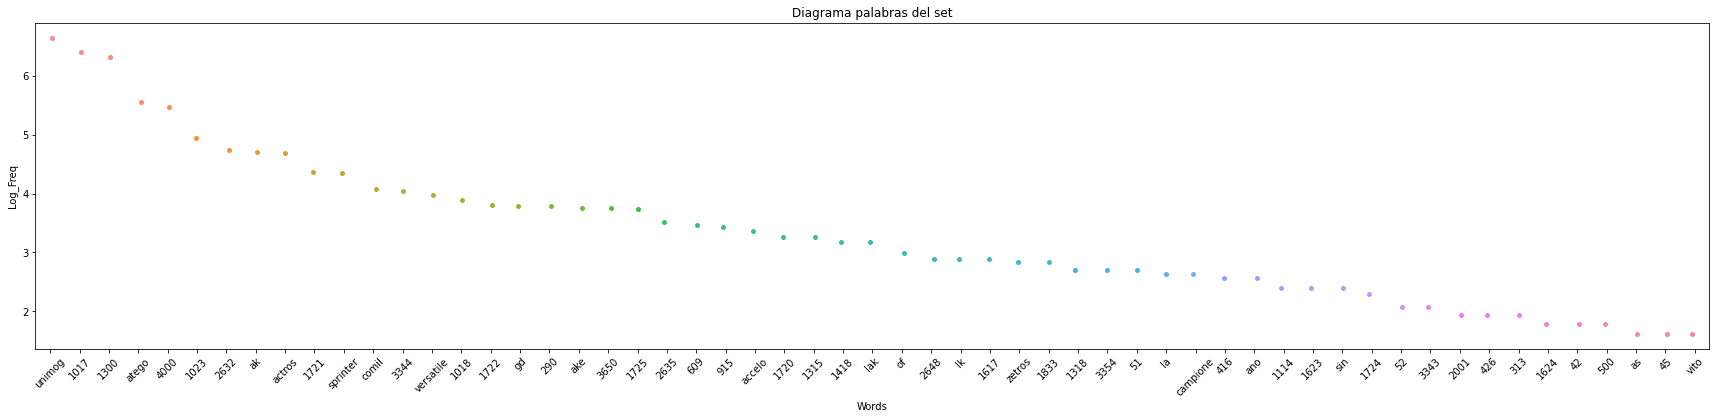

In [32]:
plt.figure(figsize=(30,6))
ax=sns.stripplot(data=tops, x='Words', y='Log_Freq')
plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Diagrama palabras del set')
plt.show()

In [33]:
df_temp[df_temp.str.contains('(?i)2632')]

2009    2632 AK
2010    2632 AK
2011       2632
2012    2632 AK
2013       2632
         ...   
4031       2632
4032       2632
4033    2632 AS
4034       2632
4035       2632
Name: Modelo, Length: 114, dtype: object

In [34]:
df[df['MMU/PPU'].str.contains("([A-Z]+)-([0-9]+)-([0-9]+)")]['MMU/PPU']

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_8012/2201119631.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df[df['MMU/PPU'].str.contains("([A-Z]+)-([0-9]+)-([0-9]+)")]['MMU/PPU']


4821    CD-69-034-22
5115       CD-20-007
Name: MMU/PPU, dtype: object

In [35]:
df['Combustible']=np.where(df['Combustible'].str.contains('DIESEL'), 'DIESEL', df['Combustible'])
df['Combustible']=np.where(df['Combustible'].str.contains('BENCI'), 'BENCINERO', df['Combustible'])
df['Combustible']=np.where(df['Combustible'].str.contains('NO APLICA'), 'NO APLICA', df['Combustible'])
df['Combustible']=np.where((df['Combustible'].str.contains('NO APLICA')) | (df['Combustible'].str.contains('DIESEL')) | (df['Combustible'].str.contains('BENCI')), df['Combustible'], 'NO APLICA')

In [36]:
df['Estanque'] = df['Estanque'].str.extract('(\d+)', expand=False)
df['Estanque'] = pd.to_numeric(df['Estanque'])

In [37]:
df_test = df.copy()

In [38]:
df_test.to_csv('Clean_Bd_Vehic.csv', encoding='latin-1', index=False)

# df_test.to_excel('Clean_Bd_Vehic.xlsx', encoding='latin-1', index=False)

In [39]:
df_test.fillna('', inplace=True)

In [40]:
df_mowag_sayago = df_test[df_test['Marca'].str.contains('(?i)MOWAG(?i)')][['MMU/PPU', 'Descripción', 'Marca', 'Modelo', 'UAC', 'UR', 'Situación Operacional', 'Condición del Bien', 'Año Fabricación']]

In [41]:
df_mowag_sayago['Año Fabricación'] = df_mowag_sayago['Año Fabricación'].astype(int)

In [42]:
df_mowag_sayago.to_excel('MOWAG_SAYAGO.xlsx', encoding='latin-1', index=False)